C:\Users\Gk\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


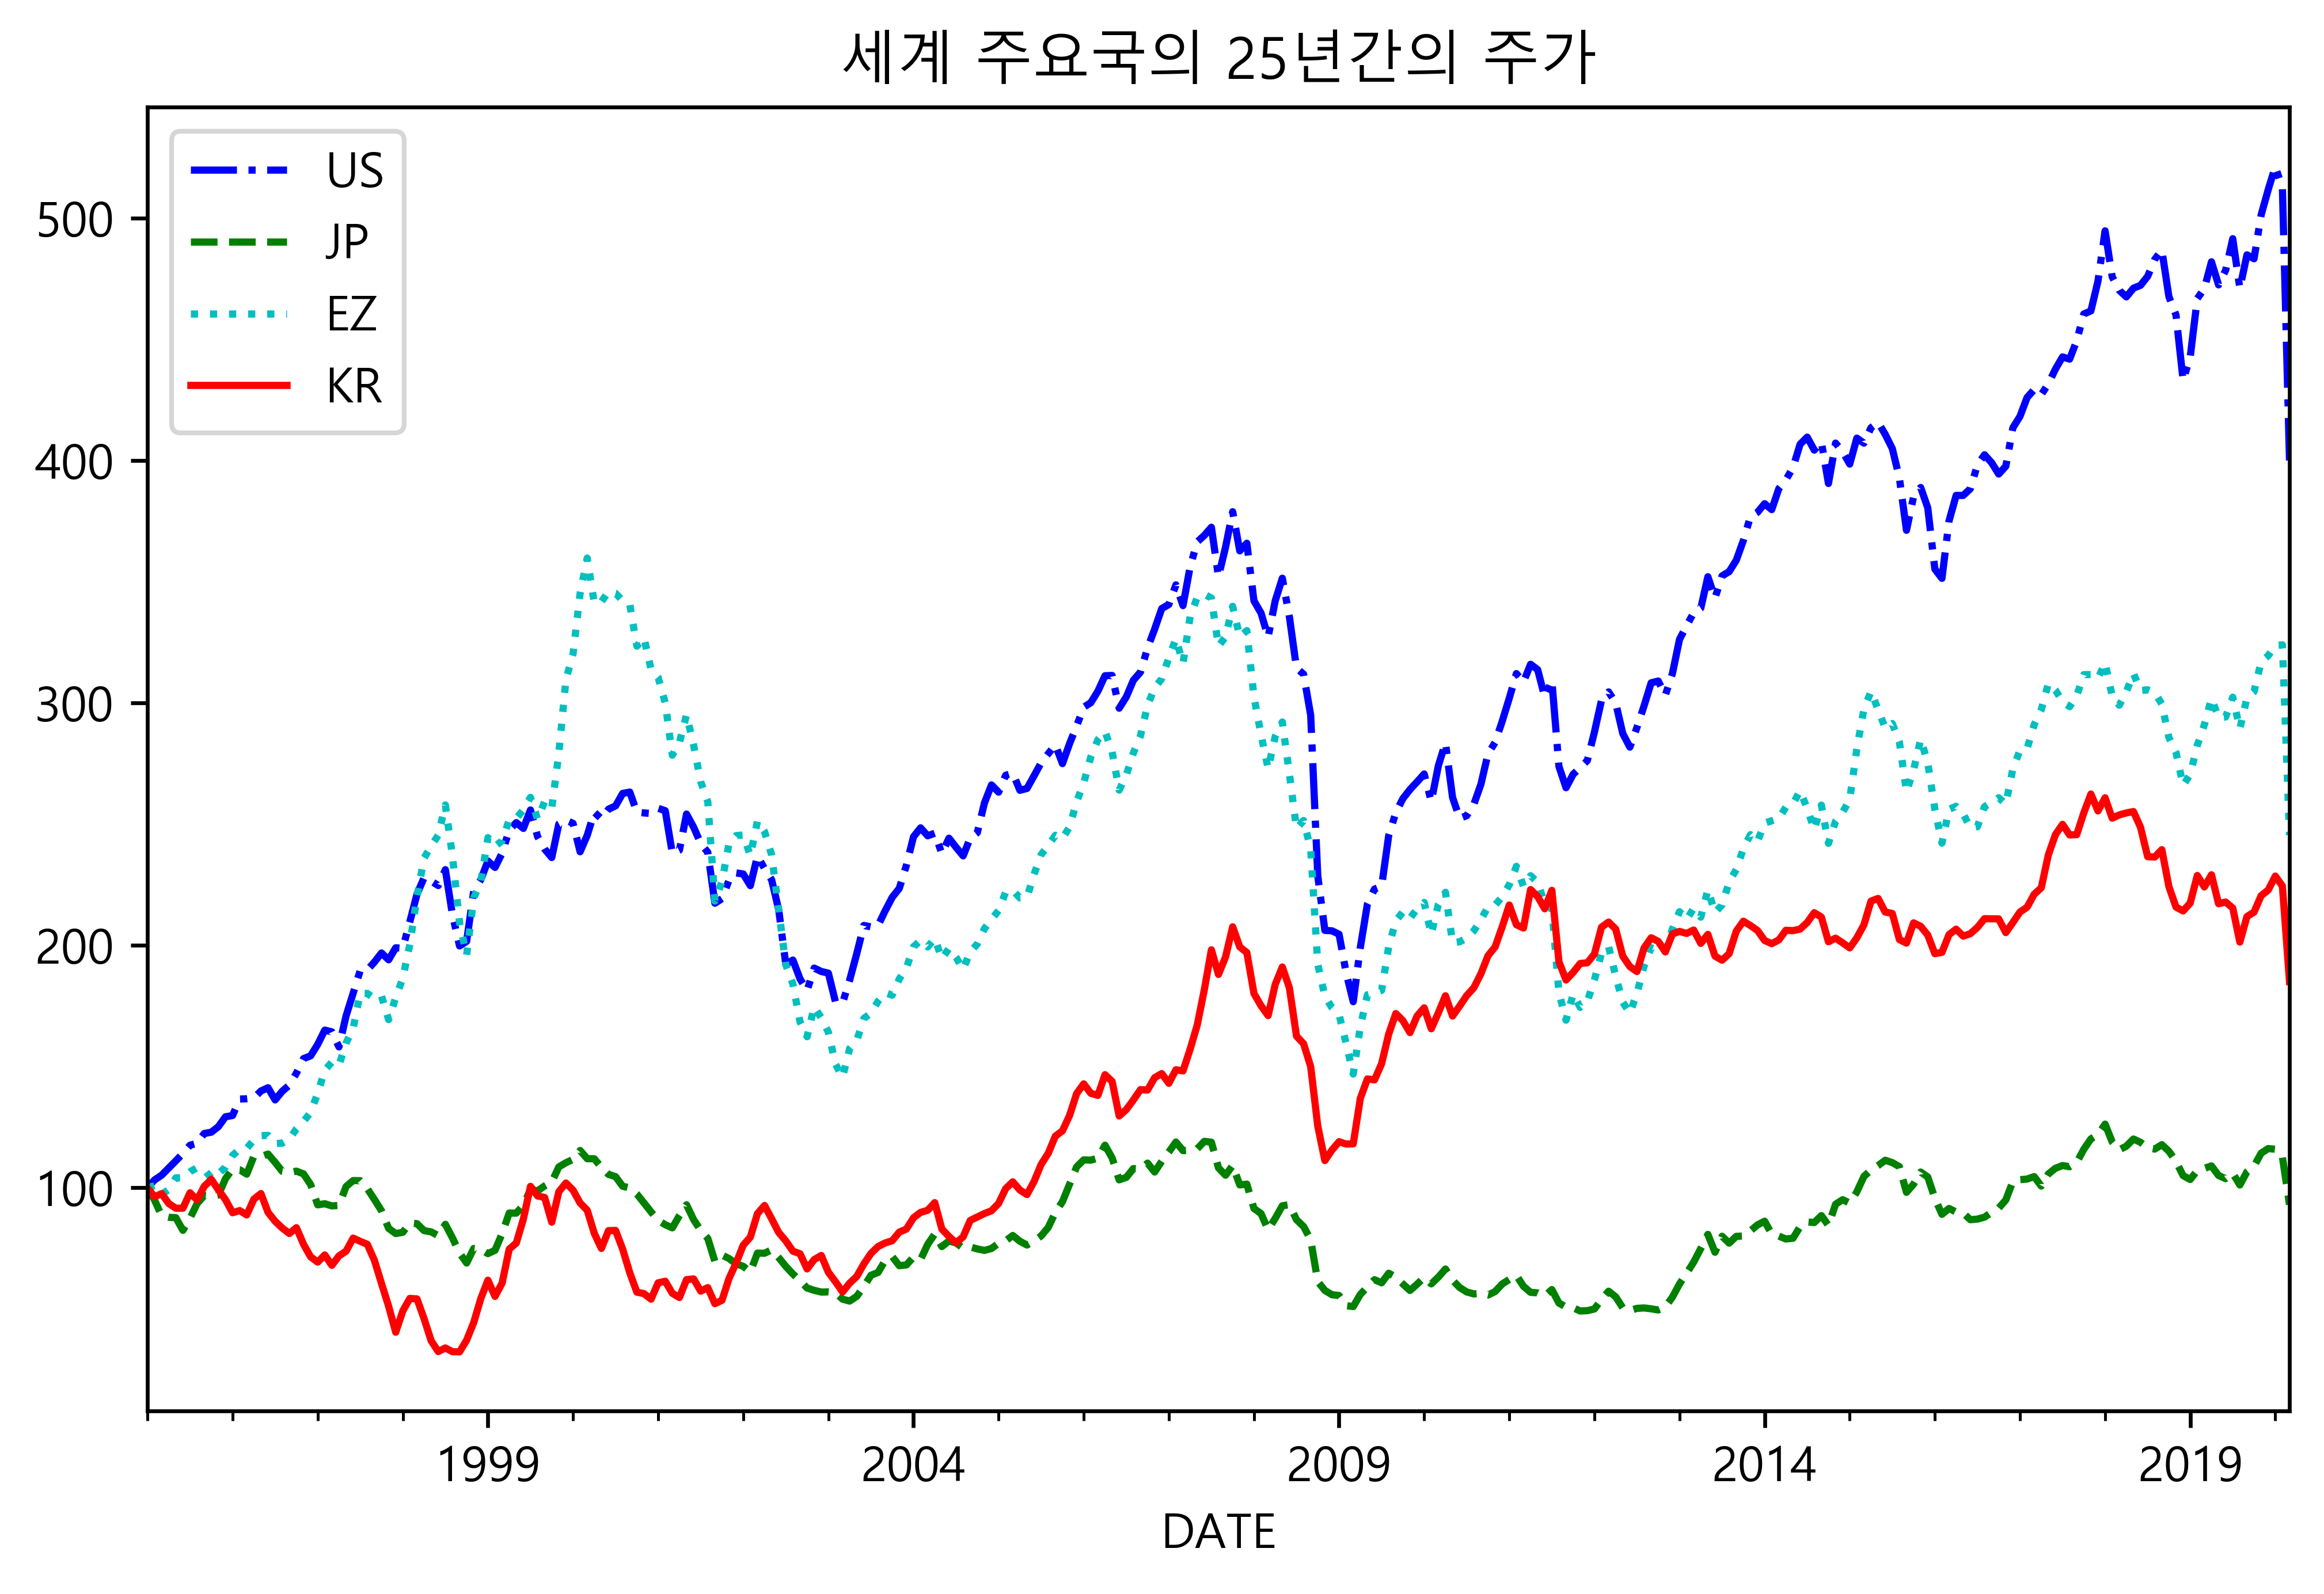

In [1]:
from sklearn.decomposition import PCA
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

symbols = [
    "SPASTT01USM661N",
    "SPASTT01JPM661N",
    "SPASTT01EZM661N",
    "SPASTT01KRM661N",
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred',
                               start=datetime.datetime(1995, 1, 1),
                               end=datetime.datetime(2020, 4, 22))[sym]
    
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 25년간의 주가")
plt.show()

In [2]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :])

DATE  1995-12-31  1996-12-31  1997-12-31  1998-12-31  1999-12-31  2000-12-31  \
US     29.314789   19.431911   28.866495   14.130346   10.800392    1.094171   
JP      3.783948   -2.324600  -19.962772   -7.977840   47.802619  -18.365577   
EZ      8.543050   20.835099   36.108726   26.739216   36.872314    1.375330   
KR     -4.889520  -24.781894  -43.483927   34.440174   87.623876  -46.975114   

DATE  2001-12-31  2002-12-31  2003-12-31  2004-12-31  ...  2011-12-31  \
US     -9.638213  -17.680773   23.135271   14.233654  ...   -5.543249   
JP    -23.827406  -16.923968   19.628102    9.945947  ...  -18.221219   
EZ    -21.857080  -30.647772   12.066127   10.551998  ...  -19.630755   
KR     27.644005    4.448180   15.121124    9.091136  ...   -7.137548   

DATE  2012-12-31  2013-12-31  2014-12-31  2015-12-31  2016-12-31  2017-12-31  \
US     13.010846   21.299603    6.609915   -5.743802    8.675742   14.638502   
JP     11.344079   54.198614   12.293250    9.842221   -1.725372   18.768

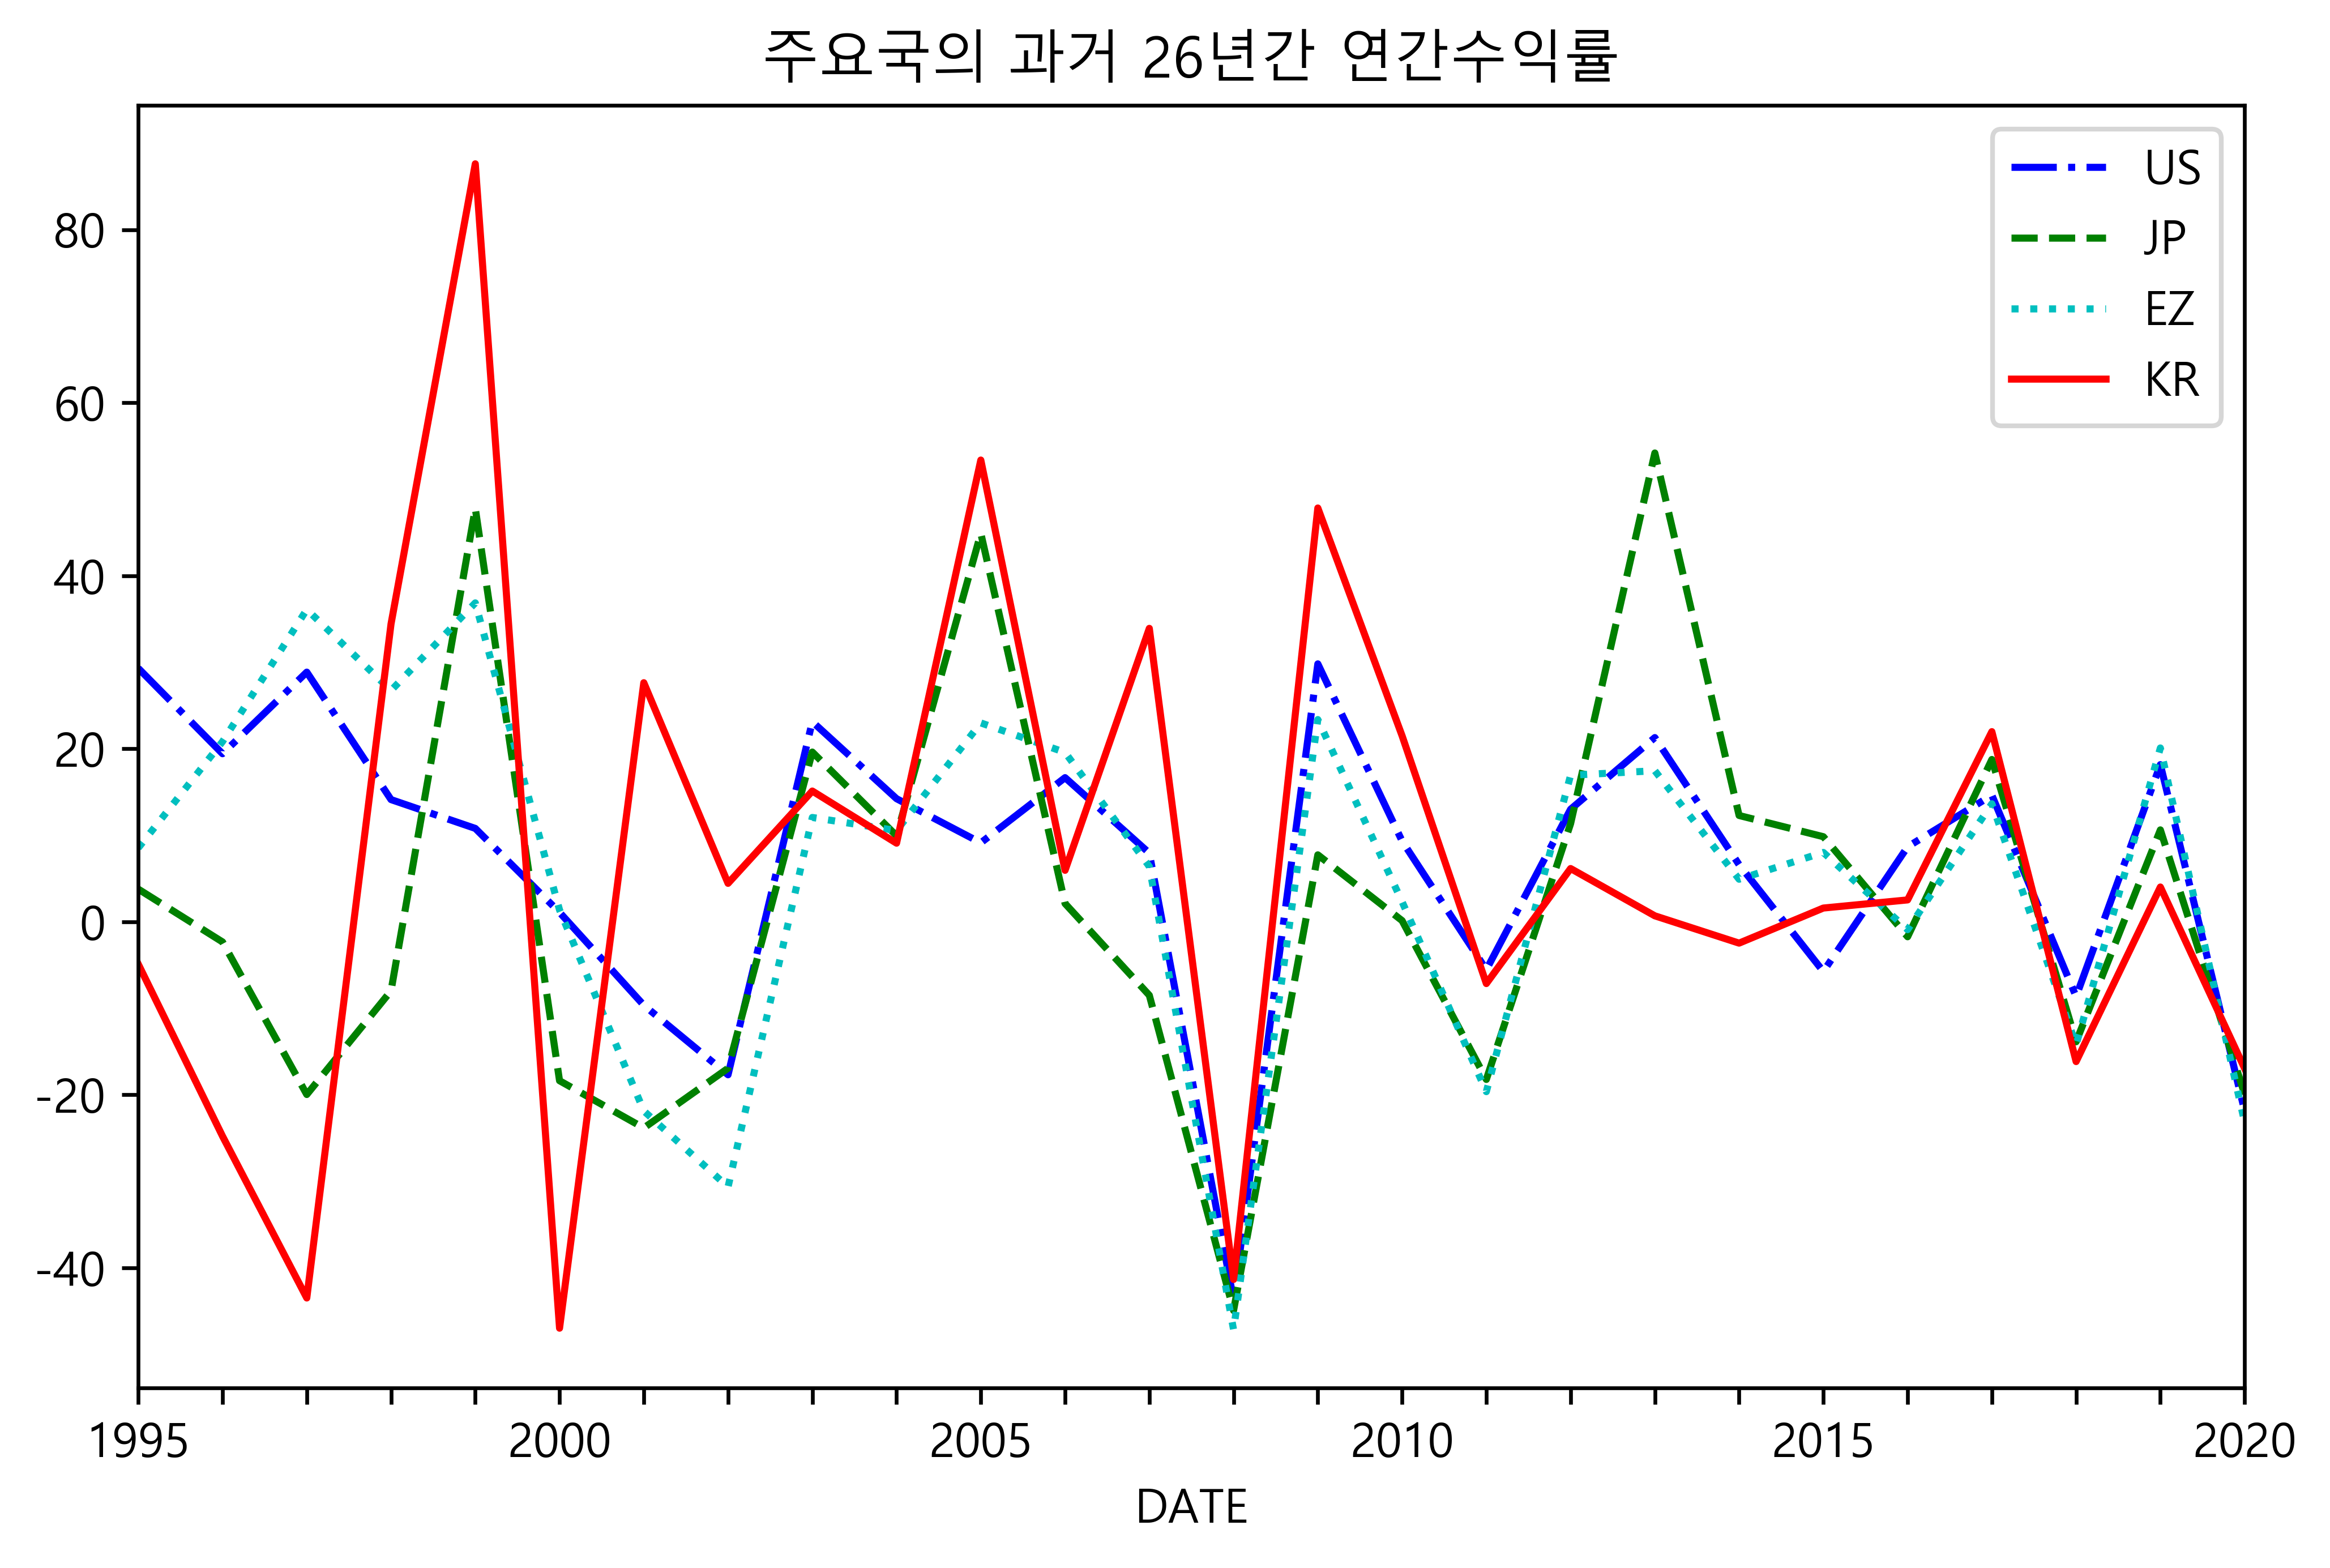

In [3]:
df.T.plot(style=styles)
plt.title("주요국의 과거 26년간 연간수익률")
plt.xticks(df.columns)
plt.show()

In [4]:
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)

In [5]:
m = pca2.mean_

In [6]:
p1 = pca2.components_[0]

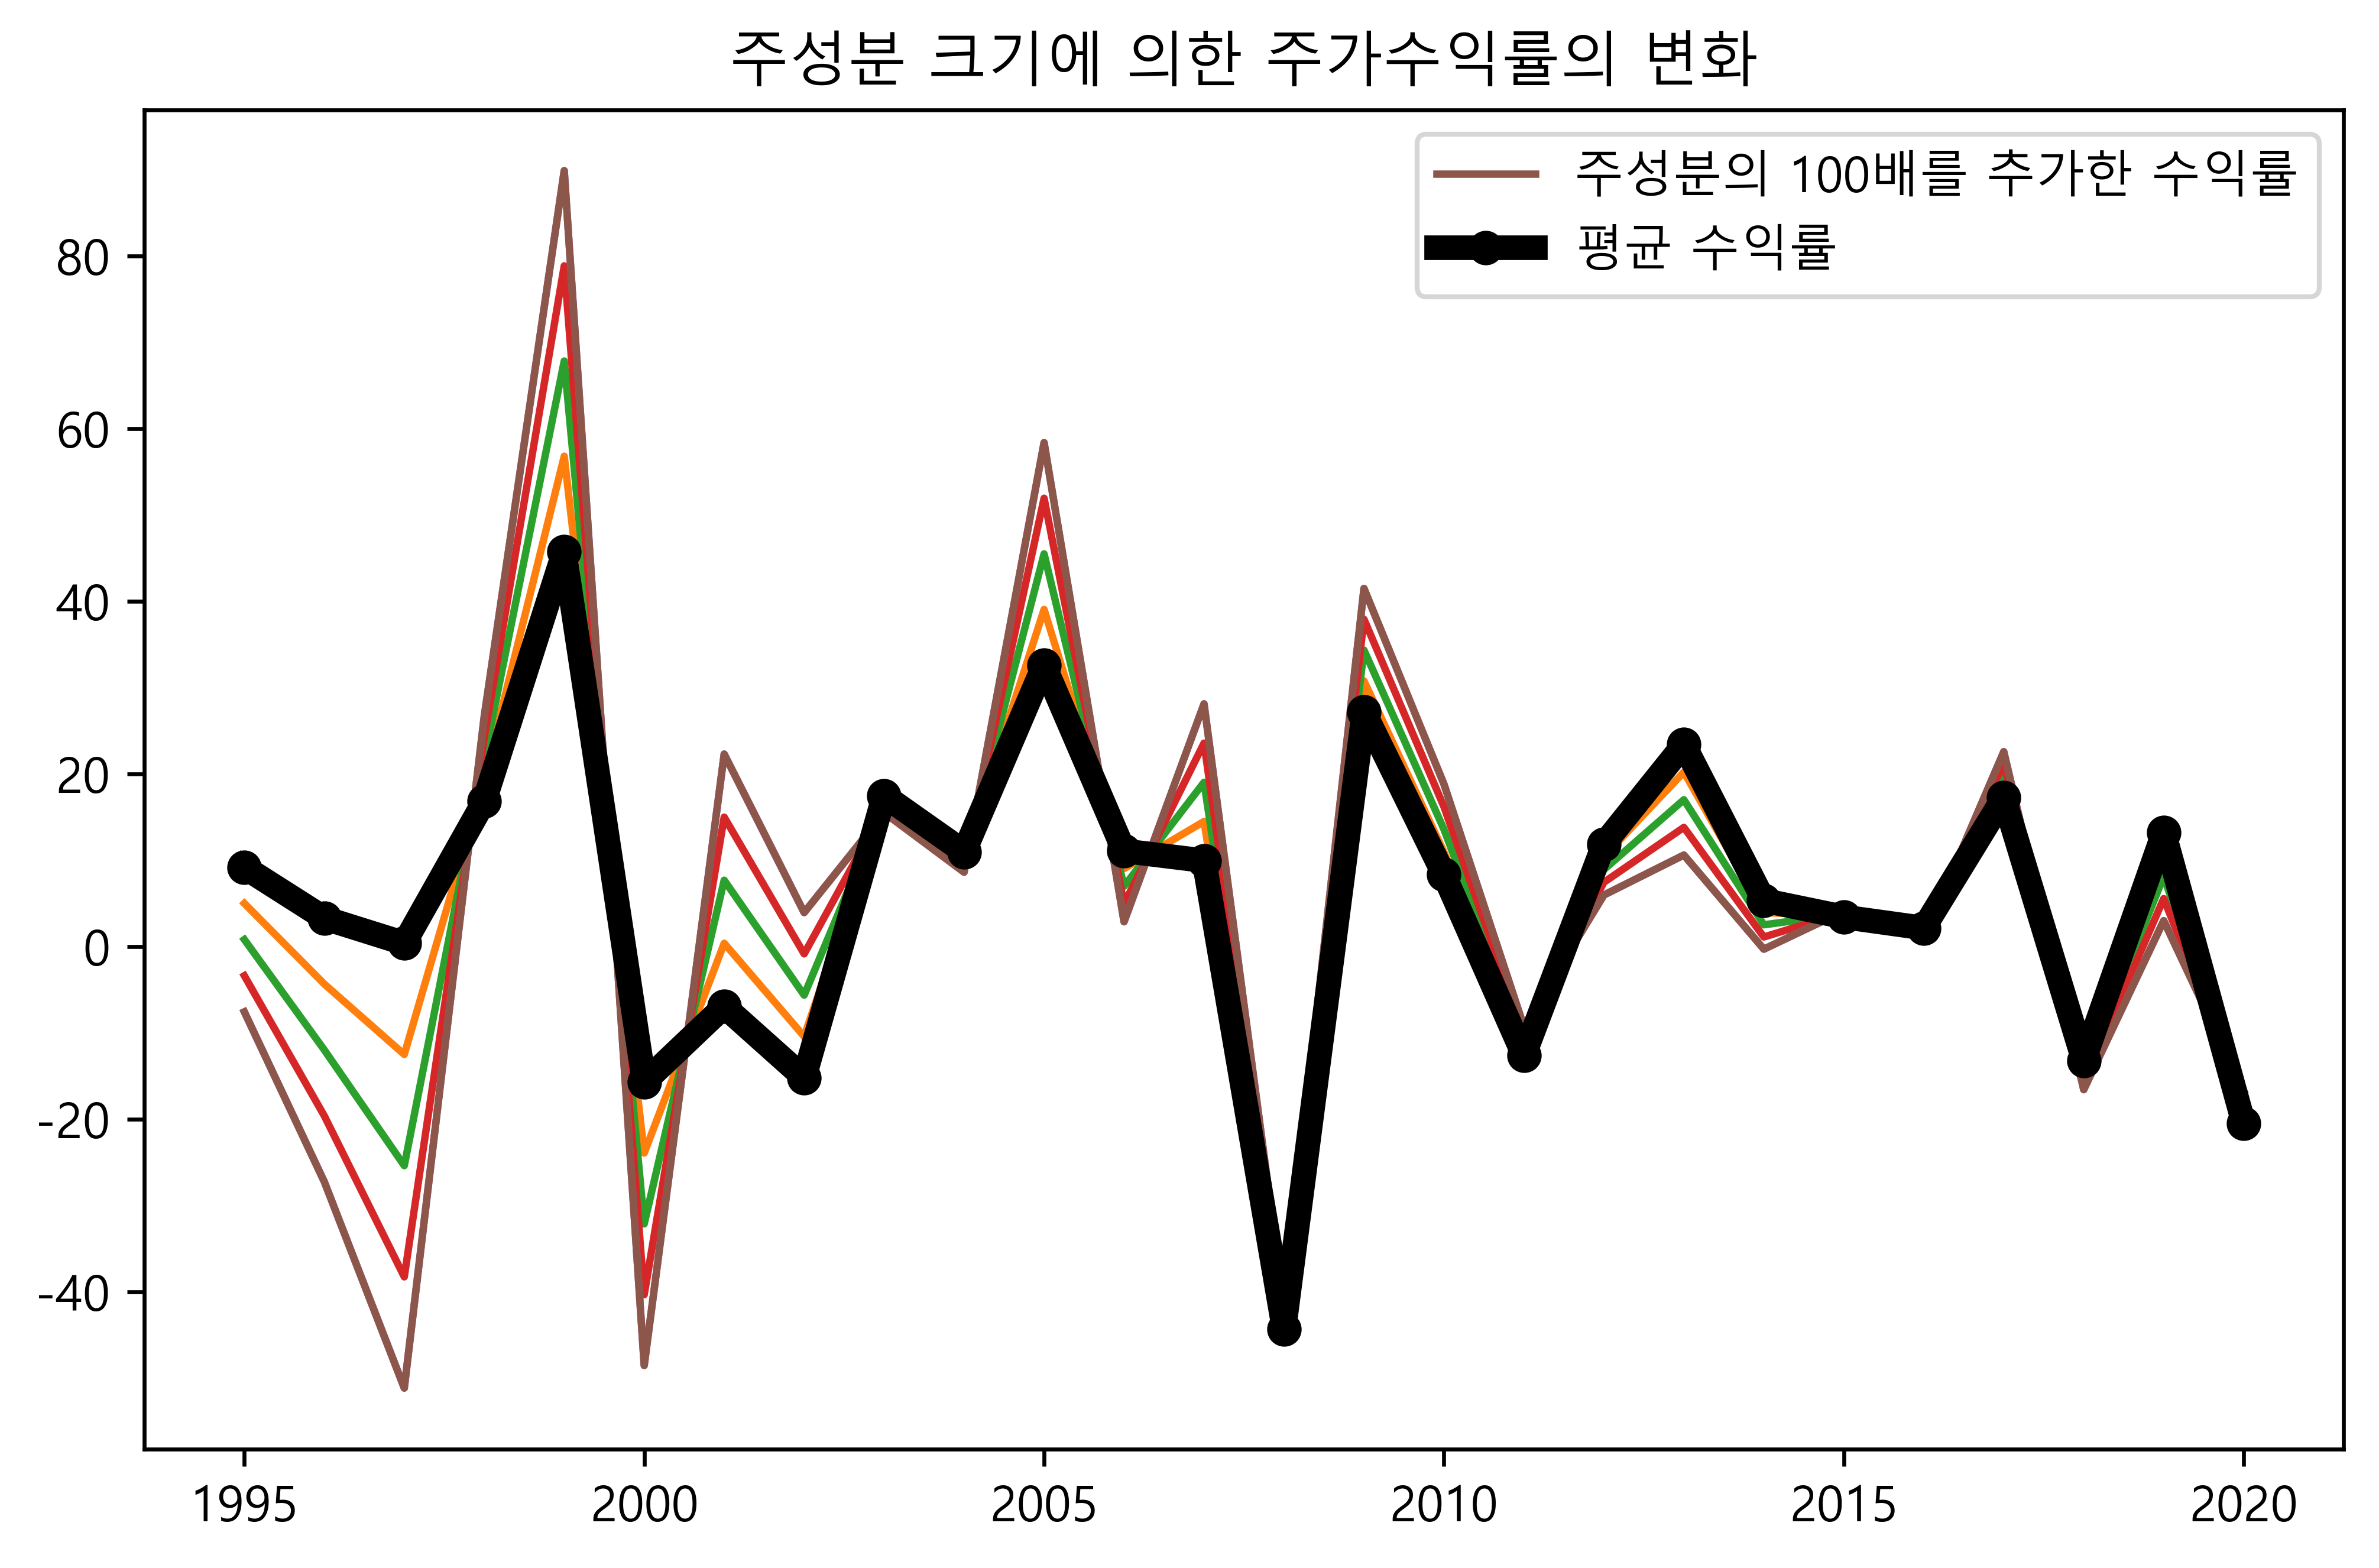

In [7]:
xrange = np.linspace(1995, 2020, 26, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.show()

In [8]:
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["주성분 비중"]
print(df_w)

       주성분 비중
US -52.633168
JP   0.019954
EZ -45.131491
KR  97.744705


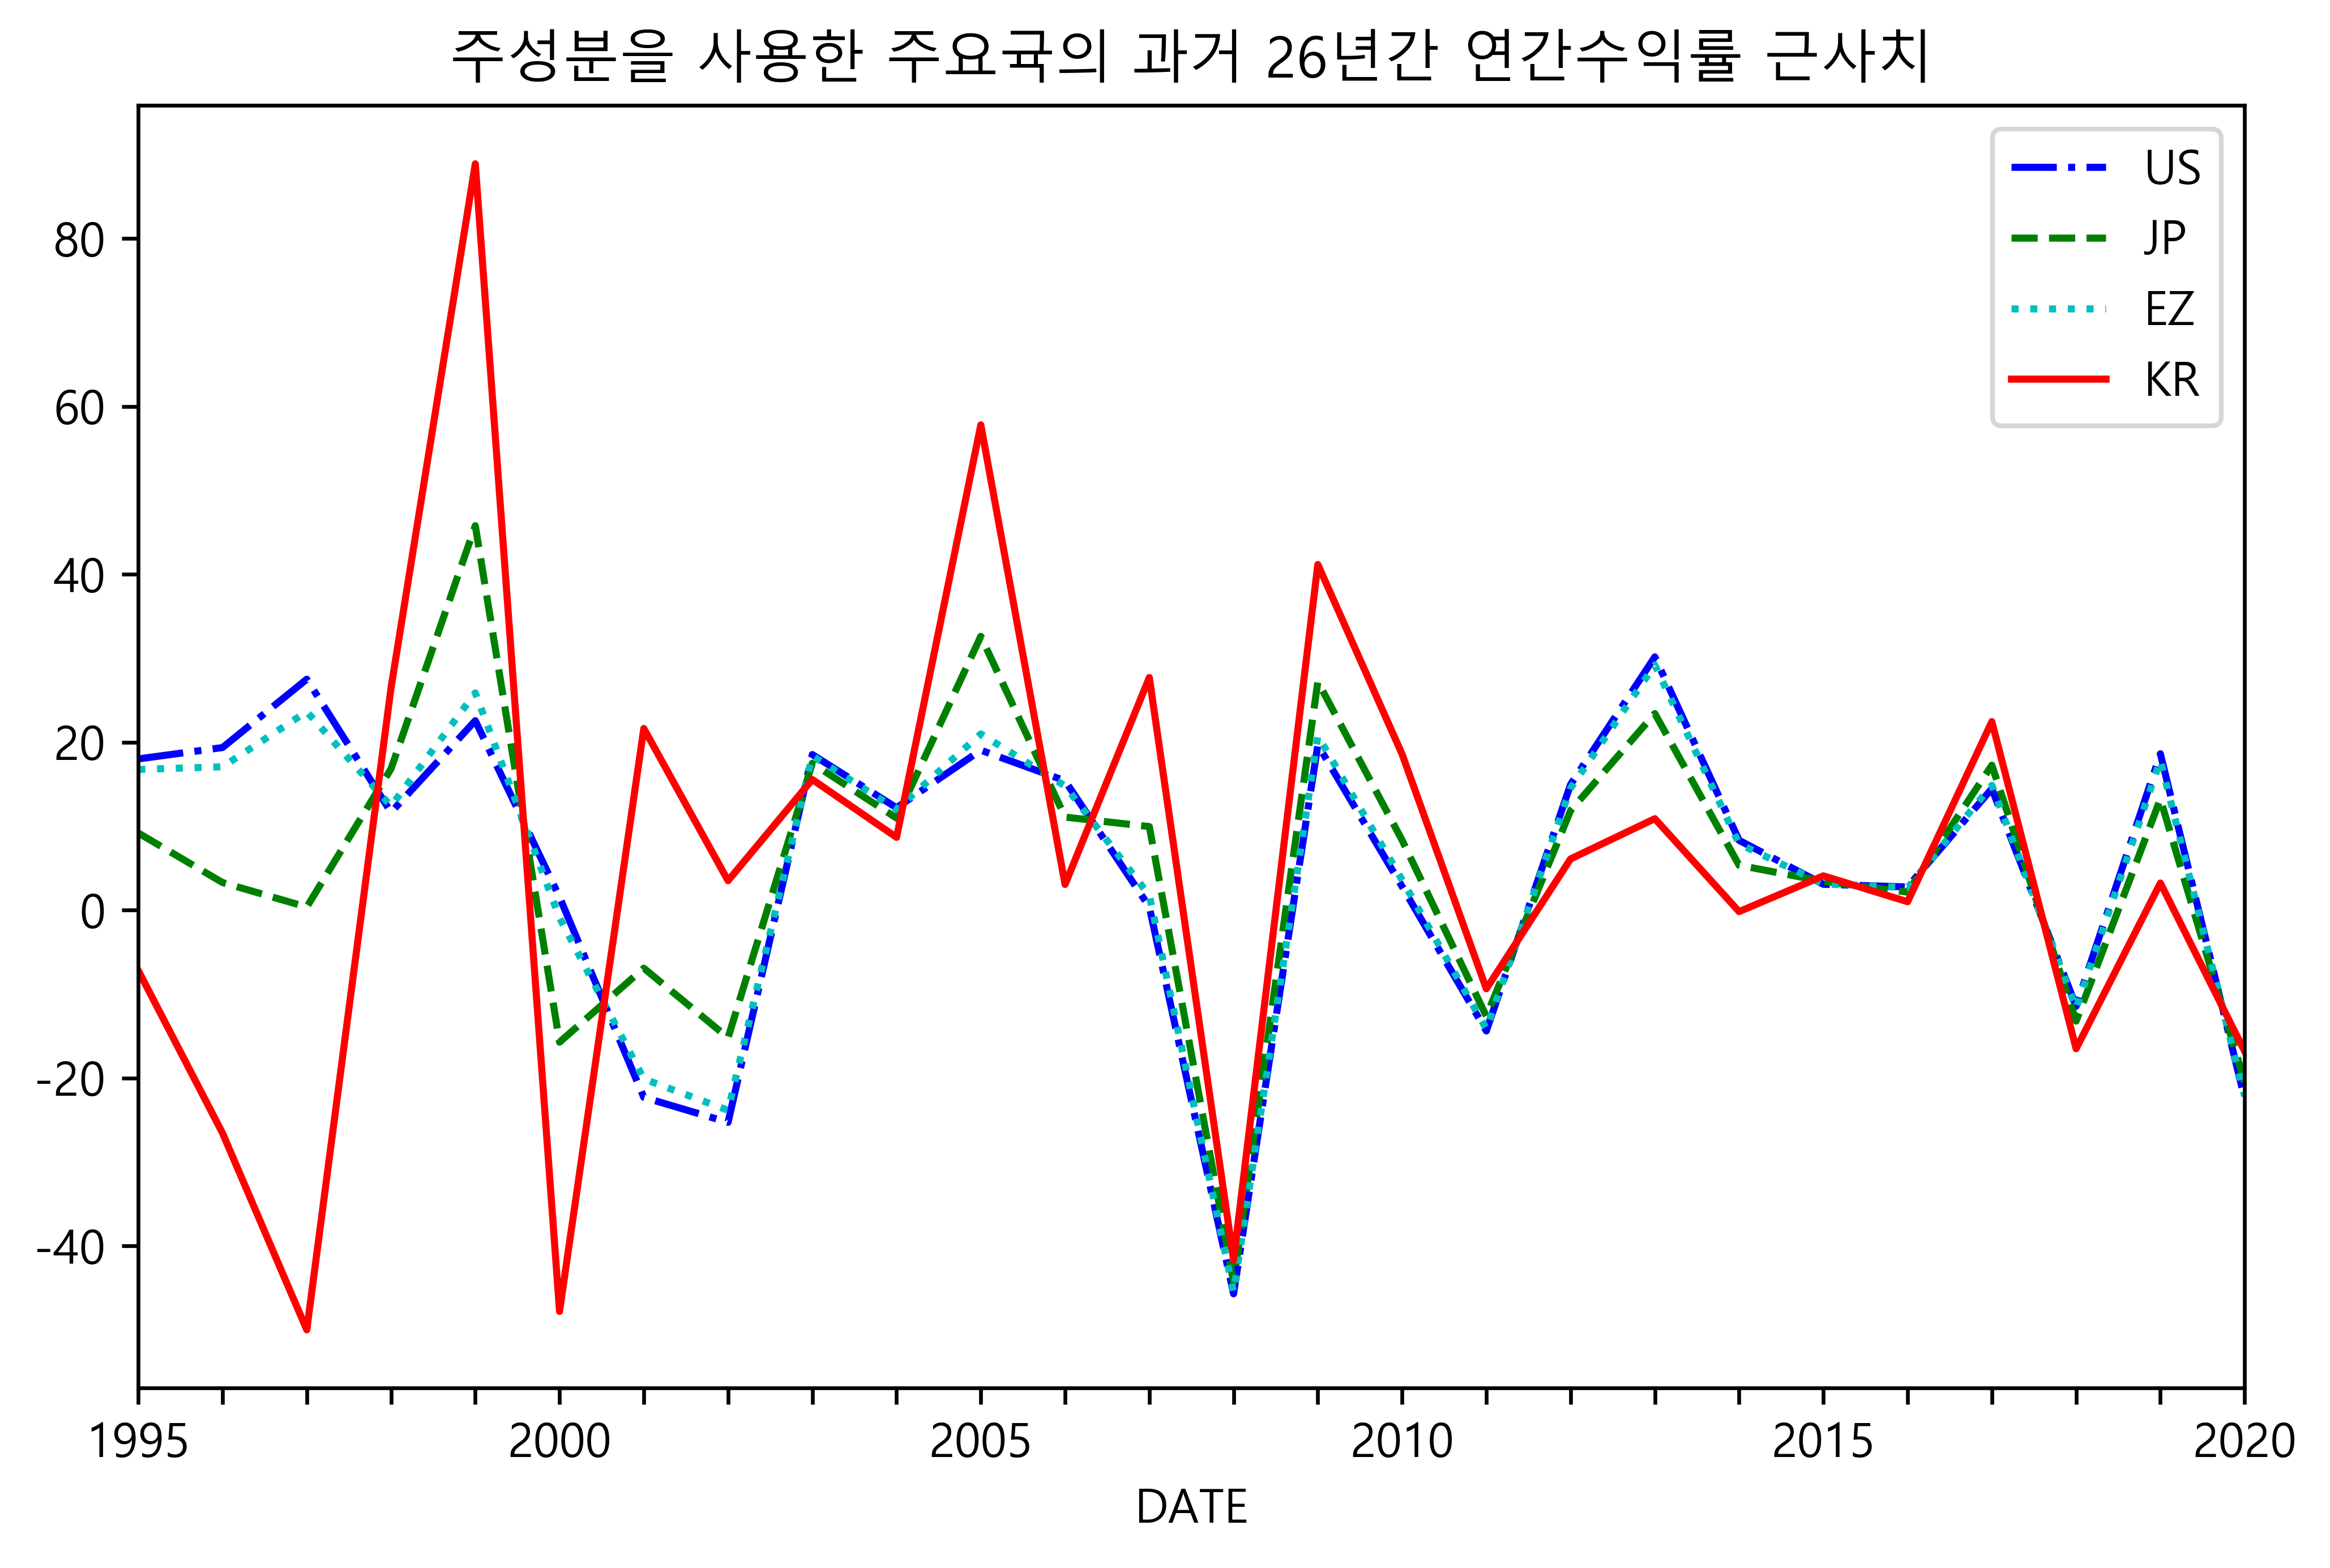

In [9]:
df_i = pd.DataFrame(pca2.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title("주성분을 사용한 주요귝의 과거 26년간 연간수익률 근사치")
plt.xticks(df.columns)
plt.show()